# Train Custom NER with Spacy v3 📣


# Importing Necessary Libraries

In [4]:
import glob, os
import pdfplumber
import torch
import spacy
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from spacy.tokens import DocBin
from tqdm import tqdm
import json
import numpy as np
import pandas as pd
import os

### Step 1 - Extracting text from pdfs and storing it in text file.

In [5]:
# path = "D:\\OneDrive_2022-01-12\\msa"
# os.chdir(path)
# pdfs = []
# for file in glob.glob("*.pdf"):
#     pdfs.append(file)

In [6]:
# import fitz
# path = "D:\OneDrive_2022-01-12\ALL MSA"
# os.chdir(path)
# data = []
# for file in glob.glob("*.pdf"):
    
#     with fitz.open(file) as doc:
#         text = ""
#         for page in doc:
#             text += page.getText().strip()
#     data.append(text)

In [8]:
path = "D:\\OneDrive_2022-01-12\\10_files\\"
os.chdir(path)
data = []
for file in glob.glob("*.pdf"):
    print(file)
    all_text = " "
    with pdfplumber.open(file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                all_text = all_text + single_page_text
    data.append(all_text)

0000000 - SFA - 09-22-2021 - 09-21-2023.pdf


In [9]:
len(data)

1

In [10]:
data[0]

' DocuSign Envelope ID: 25339DCA-2B39-4BF3-9BA2-3FBE71D2D9A3\n \nSUPPLIER FRAMEWORK AGREEMENT \n \nThis Supplier Framework Agreement (this “Supplier Framework Agreement”), effective as of the last signature date below \n(the “Effective Date”), is by and between Radiant Logic, Inc., with its principal place of business at 75 Rowland Way, Ste 300, \nNovato, California 94945 “Supplier”), and Alight Solutions LLC,  with its principal place of business at 4 Overlook Point, \nLincolnshire, IL 60069 (“Alight” and, together with Supplier, each a “Party” and collectively the “Parties”). In consideration \nof the mutual covenants contained herein, and other valuable consideration, the receipt and sufficiency of which are hereby \nacknowledged, the Parties agree as follows: \nContractual Framework.  This Supplier Framework Agreement is a framework arrangement that sets forth terms for each \nOrder (as defined below). This Supplier Framework Agreement does not establish any rights, obligations or 

In [11]:
##### counter = 0
# data = []
# for file in os.listdir("D:\\Train_data"):
#     filename = os.fsdecode(file)
#     if filename.endswith('.pdf'):
#         all_text = '' # new line
        
#         with pdfplumber.open(file) as pdf:
#             for pdf_page in pdf.pages:
#                 single_page_text = pdf_page.extract_text()
#                 all_text = all_text + '\n' + single_page_text
#             data.append(all_text)
            
#             # print(text) - comment out or remove line

In [12]:
data[0]

' DocuSign Envelope ID: 25339DCA-2B39-4BF3-9BA2-3FBE71D2D9A3\n \nSUPPLIER FRAMEWORK AGREEMENT \n \nThis Supplier Framework Agreement (this “Supplier Framework Agreement”), effective as of the last signature date below \n(the “Effective Date”), is by and between Radiant Logic, Inc., with its principal place of business at 75 Rowland Way, Ste 300, \nNovato, California 94945 “Supplier”), and Alight Solutions LLC,  with its principal place of business at 4 Overlook Point, \nLincolnshire, IL 60069 (“Alight” and, together with Supplier, each a “Party” and collectively the “Parties”). In consideration \nof the mutual covenants contained herein, and other valuable consideration, the receipt and sufficiency of which are hereby \nacknowledged, the Parties agree as follows: \nContractual Framework.  This Supplier Framework Agreement is a framework arrangement that sets forth terms for each \nOrder (as defined below). This Supplier Framework Agreement does not establish any rights, obligations or 

In [13]:
# counter = 0
# data = []
# data1 = []
# for file in pdfs:
#     all_text = '' # new line
#     with pdfplumber.open(file) as pdf:
#         for pdf_page in pdf.pages:
#             single_page_text = pdf_page.extract_text()
#             print(single_page_text)
#             break
#                # separate each page's text with newline
#                 #all_text = all_text + '\n' + single_page_text
#             #data.append([file,pdf_page,single_page_text])
# #             for i in data:
# #                 all_text = all_text + '\n' + i[2]
# #                 data1.append(all_text)
# #                 break

In [14]:
# data = []
# from PyPDF2 import PdfFileReader
# import PyPDF2
# for i in pdfs:
    
#     pdfFileObj = open(i, 'rb')
#     pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#     if pdfReader.isEncrypted:
        
#         try:
#             pdfReader.decrypt('')
#             #print('File Decrypted (PyPDF2)')
#         except:
#             command = ("cp "+ i +
#             " temp.pdf; qpdf --password='' --decrypt temp.pdf " + i
#             + "; rm temp.pdf")
#             os.system(command)
#             print('File Decrypted (qpdf)')
#             fp = open(i)
#             pdfFile = PdfFileReader(pdfFileObj)
#     else:
#         print('File Not Encrypted')
    
#     numPages=pdfReader.numPages
#     print(numPages)
#     page_content=""                # define variable for using in loop.
#     for page_number in range(numPages):
#         page = pdfReader.getPage(page_number)
#         page_content += page.extractText()     # concate reading pages
# data.append(page_content)

In [15]:
len(data)

1

In [16]:
#remove urls from text python
new_data = []
for i in data:
    clean_line = re.sub(r"http\S+", "", i)
    new_data.append(clean_line)

In [17]:
#python-beautifulsoup-how-to-remove-all-tags-from-an-element
new_data1 = []
for i in new_data:
    
    soup = BeautifulSoup(i,"lxml")
    text = soup.get_text()
    new_data1.append(text)

### Step 2 - Data Cleaning

In [18]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [20]:
new_data1[0]

'DocuSign Envelope ID: 25339DCA-2B39-4BF3-9BA2-3FBE71D2D9A3\n \nSUPPLIER FRAMEWORK AGREEMENT \n \nThis Supplier Framework Agreement (this “Supplier Framework Agreement”), effective as of the last signature date below \n(the “Effective Date”), is by and between Radiant Logic, Inc., with its principal place of business at 75 Rowland Way, Ste 300, \nNovato, California 94945 “Supplier”), and Alight Solutions LLC,  with its principal place of business at 4 Overlook Point, \nLincolnshire, IL 60069 (“Alight” and, together with Supplier, each a “Party” and collectively the “Parties”). In consideration \nof the mutual covenants contained herein, and other valuable consideration, the receipt and sufficiency of which are hereby \nacknowledged, the Parties agree as follows: \nContractual Framework.  This Supplier Framework Agreement is a framework arrangement that sets forth terms for each \nOrder (as defined below). This Supplier Framework Agreement does not establish any rights, obligations or l

In [21]:
# Combining all the above  
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in range(0,len(new_data1)):
    new_data1[sentance] = BeautifulSoup(new_data1[sentance]).get_text()
    new_data1[sentance] = decontracted(new_data1[sentance])
    #new_data1[sentance] = re.sub("\S*\d\S*", "", new_data1[sentance]).strip() #to remove nos
    #new_data1[sentance] = re.sub('[^A-Za-z]+', ' ', new_data1[sentance])
    new_data1[sentance] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", new_data1[sentance]) # emails
    new_data1[sentance] = re.sub(r'[^\w ]+', "", new_data1[sentance])
    new_data1[sentance] = re.sub(r'[A-Za-z]+[\d]+[\w]*|[\d]+[A-Za-z]+[\w]*'," ",new_data1[sentance]) # for alphanummerical
    new_data1[sentance] = re.sub(r'[_]'," ",new_data1[sentance])
    # https://gist.github.com/sebleier/554280
    new_data1[sentance] = ' '.join(e.lower() for e in new_data1[sentance].split() if e.lower() not in stopwords)
    preprocessed_reviews.append(new_data1[sentance].strip())

In [22]:
new_data1[0]

'docusign envelope id supplier framework agreement supplier framework agreement supplier framework agreement effective last signature date effective date radiant logic inc principal place business 75 rowland way ste 300 novato california 94945 supplier alight solutions llc principal place business 4 overlook point lincolnshire il 60069 alight together supplier party collectively parties consideration mutual covenants contained herein valuable consideration receipt sufficiency hereby acknowledged parties agree follows contractual framework supplier framework agreement framework arrangement sets forth terms order defined supplier framework agreement not establish rights obligations liabilities unless extent terms supplier framework agreement incorporated order case terms shall binding upon parties order order may entered parties supplier framework agreement respective affiliates references alight supplier partyies supplier framework agreement shall refer applicable entities entered order

In [23]:
len(new_data1)

1

In [20]:
import os.path
save_path = 'D:\\OneDrive_2022-01-12\\z'
name_of_file = 0
counter = 0
for i in new_data1:
    completeName = os.path.join(save_path, str(counter) +".txt")         
    with open(completeName,'w',encoding='utf-8') as file1:
        file1.write(i)
        counter+=1


In [21]:
new_data1

['docusign envelope id confidential supplier framework agreement supplier framework agreement agreement entered november 1 2018 effective date northgate information solutions limited offices peoplebuilding 2 peoplebuilding estate maylands avenue hemel hempstead hertfordshire england behalf affiliates nga benify ab registered office banérgatan 16 115 23 stockholm sweden behalf affiliates supplier either abovementioned parties also referred party collectively parties whereas nga desires supplier provide certain services described duly executed statement work supplier agrees provide nga affiliates including services support nga contracts therefore consideration premises mutual covenants agreements herein set forth supplier nga agree follows definitions capitalized terms herein schedule attachment meanings ascribed terms section otherwise defined agreement affiliate means entity directly indirectly controls controlled common control party control controls controlled means used respect pers

### Step 3 - Annotate your data

https://tecoholic.github.io/ner-annotator/

! pip install -U spacy -q

In [22]:
! pip install -U spacy -q

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Users\\A1058564\\Anaconda3\\Lib\\site-packages\\~pacy\\attrs.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'D:\Users\A1058564\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.2.3                         
Location         D:\Users\A1058564\Anaconda3\lib\site-packages\spacy
Platform         Windows-10-10.0.19042-SP0     
Python version   3.9.7                         
Pipelines        en_core_web_sm (3.2.0)        



2022-04-08 13:30:14.912396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-08 13:30:14.912446: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Step 4 - Conversion of Json Data to .spacy format/Object

In [77]:
!python -m spacy download en_core_web_lg

2022-03-06 02:15:14.945505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-06 02:15:14.945548: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
ERROR: Could not install packages due to an OSError: Could not find a suitable TLS CA certificate bundle, invalid path: D:\Users\A1058564\certs\ca-bundle.crt

You should consider upgrading via the 'D:\Users\A1058564\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
import spacy
from spacy.tokens import DocBin
nlp =  spacy.blank('en')  # load a new spacy model
db = DocBin(store_user_data=True) # create a DocBin object
db1 = DocBin(store_user_data=True)

In [26]:
# os.chdir(r'D:\\OneDrive_2022-01-12\\Annotated_ALLSFA_21\\Training Files')
# file = 'D:\\OneDrive_2022-01-12\\msafortesting\\Demo\\Traning and Validated data\\Training Data.json'         
# f = open(file,encoding='UTF-8')
# TRAIN_DATA = json.load(f)

In [27]:
# TRAIN_DATA
import random
import os
from math import floor

In [28]:
def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    data_files = list(filter(lambda file: file.endswith('.json'), all_files))
    return data_files

def randomize_files(file_list):
    shuffled = random.sample(list_of_files, len(list_of_files))
    return shuffled

def get_training_and_testing_sets(file_list):
    split = 0.7
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

def ml_function(datadir = 'D:\RANDOMSAMPLES'):
    list_of_files = get_file_list_from_dir(datadir)
    suffled_data = randomize_files(list_of_files)
    training, testing = get_training_and_testing_sets(suffled_data)


In [29]:
training

NameError: name 'training' is not defined

In [8]:
for filename in training:
    f = open(filename,encoding='UTF-8')
    TRAIN_DATA = json.load(f)

    for text, annot in tqdm(TRAIN_DATA['annotations']):
        doc = nlp.make_doc(text) 
        ents = []
        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        doc.ents = ents 
        db.add(doc)

os.chdir(r'D:\OneDrive_2022-01-12\training_data')
db.to_disk("./train.spacy") # save the docbin object

NameError: name 'training' is not defined

In [6]:
os.chdir("D:\\RANDOMSAMPLES\\TrainingSAMPLE\\")
for filename in os.listdir("D:\\RANDOMSAMPLES\\TrainingSAMPLE\\"):
    print(filename)
    f = open(filename,encoding='UTF-8')
    TRAIN_DATA = json.load(f)
    
    for text, annot in tqdm(TRAIN_DATA['annotations']): 
        
        doc = nlp.make_doc(text) 
        ents = []
        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        doc.ents = ents 
        db.add(doc)

os.chdir(r'D:\OneDrive_2022-01-12\training_data')
db.to_disk("./train.spacy") # save the docbin object

- Master Service Agreement - 10-18-2021 - 10-18-2099.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.98it/s]


0000000 - SFA - 09-22-2021 - 09-21-2023.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.67it/s]


1031717-NGA-MSA-010119-123122.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.44it/s]


1044256-NGA-MSA-110618-110621.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.59it/s]


1044542-NGA-MSA-031819-031820.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.20it/s]


Alight_IDMWorks.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.83it/s]


Alight_Supplier_Framework_Agreement_-_Dileoz_NV.docx.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]


ASAP_Staffing_-_SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


Beecher Reagan-Alight SFA (9-16-21).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]


BLUEWAVE SELECT LTD - MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.01it/s]


Dummy_- Master Service Agreement - 10-18-2021 - 10-18-2099.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


Dummy_1031717-NGA-MSA-010119-123122.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.93it/s]


dummy_Alight_IDMWorks.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.86it/s]


Dummy_Beecher Reagan-Alight SFA (9-16-21).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.05it/s]


Dummy_LM Consulting - SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


Freemont Associates - SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.52it/s]


Imbri Resourcing 1042908 MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]


Infocom SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.50it/s]


LEADINGDEV SOLUTIONS SL. 1044585 SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


LM Consulting - SFA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]


MSA signature page.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.50it/s]


MT SP Agt 05-13-09.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.04it/s]


My Corporate Ally MSA FY2021.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]


NETREO INC-Master Service Agreement-Master Services Agreement-1-01-2015.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.17it/s]


Nevin Zimmermann LLC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.47it/s]


NEWSWEAVER-Master Service Agreement-Master Services Agreement-4-15-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


NGA-Empower Agreement Dec 30, 2014 - Fully Executed.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


NGAUS-EXXOVA MSA - FINAL 12-04-2009.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.50it/s]


NobleSystems-Cloud Services-MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]


NOONDAY VENTURES INC-Master Service Agreement-Master Services Agreement-1-01-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.82it/s]


NorthgateArinso - e-know - Web Services Agreement FULLY EXECUTED 9-30-10.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]


NorthgateArinsoMSAandSOW_signed6-22-10.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.25it/s]


OPTIMAL WORKSHOP LIMITED MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Optiv-Alight-MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.19it/s]


Outsolve, LLC-Master Service Agreement-Master Services Agreement-12-08-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.99it/s]


Outsourcing Services Agreement 4.08.05 Best.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.39it/s]


PALOMA PRODUCT MARKETING-Master Software License Agreement-Purchase Order-2-17-2010.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.16it/s]


PARASOFT CORPORATION-Master Software License Agreement-Master Software License Agreement-5-04-2016.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.82it/s]


PARKPLACE_MSA_2021-08-09_001.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.53it/s]


Peopleclick MSA_6.29.07.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.71it/s]


People_First_Next_Generation_Contract_FINAL.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]


Pkware, Inc-Master Software License Agreement-PKWARE, Inc.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.56it/s]


RapidIT-Cloudbera Inc.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.70it/s]


REED GROUP LTD-Master Service Agreement-Leave Management Services Agreement-1-01-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.24it/s]


Revelation Software_EULA & Schedules_033007.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


RISK COMPLIANCE PERFORMANCE SOLUTIONS LL-Master Service Agreement-Master Services Agreement-8-24-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.02it/s]


RIVERBED TECHNOLOGY INC-Master Software License Agreement-Sale And License Agreement-6-10-2015.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


ROCKET SOFTWARE INC-Master Software License Agreement-Master License Agreement-3-16-2012.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]


RYAN LLC-Master Software License Agreement-Software License Agreement-7-01-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.99it/s]


SAFE SOFTWARE INC-Master Software License Agreement-Software License Agreement-12-29-2000.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.61it/s]


SAP Cloud Services Agreement 2013.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.05it/s]


Sirva Relocation Limited - MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.52it/s]


SITEL OPERATING CORPORATION-Master Service Agreement-Master Services Agreement-4-24-2012.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


SODEXO INC-Standard Service Agreement-Standard Services Agreement-8-01-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


SOF_licenses_BPO - request to include in commitment.json


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.36it/s]


Southwest MSA 050118.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.47it/s]


Standard Services Agreement.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.81it/s]


State Medical Boards of the United States Inc.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.56it/s]


STRAWBERRYFROG LLC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


STRENUUS LLC-Master Service Agreement-Master Services Agreement-12-10-2015.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.42it/s]


SUNGARD AVAILABILITY SERVICES LP-Master Service Agreement-Subscription Services Agreement-7-01-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]


Superhero Cheesecake-Master Service Agreement-Master Services Agreement-9-27-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


SUPP-00000785 - SOW- 09-23-2021 - 12-31-2021.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.28it/s]


SUPPLIERGATEWAY LLC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.46it/s]


SWLA Schedule 1_signed.json


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.11it/s]


Tanium MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.49it/s]


TAPFIN PROCESS SOLUTIONS A MANPOWERGROUP-Master Service Agreement-Master Services Agreement-7-31-2017 (1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.85it/s]


TELEPLUS INC-Master Service Agreement-Master Services Agreement-1-01-2015.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.90it/s]


TELUS - MSA_060121_053123 (1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.66it/s]


Tenable MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.72it/s]


VISION CRITICAL COMMUNICATIONS US INC-Master Software License Agreement-SPARQ Software License And Support Services Agreement-2-19-2012.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.24it/s]


Vurv License Agreement 122404 for SOT.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.00it/s]


Vurv SLA 11 13 06_53rd_Recruiting.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.33it/s]


Wildlife Design MSA FINAL.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.12it/s]


WILLIS TOWERS WATSON US LLC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.54it/s]


WINDWARD STUDIOS INC-Master Software License Agreement-License Agreement-11-01-2013.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 41.67it/s]


Wipro LLC-Master Service Agreement-Master Services Agreement-09-01-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


Wipro LLC-Master Software License Agreement-Software License Agreement-09-01-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.69it/s]


WIPRO_MSA_2018-04-09_001.json


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.60it/s]


WIRED COMMUTE INC-Master Services Agreement-Master Service Agreement-01-01-2008.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.26it/s]


Workbrain, Inc-Master Service Agreement-Master BPO License And Services Agreement-9-01-2003.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.82it/s]


WORKFORCE OUTSOURCE SERVICES INC-Master Service Agreement-Consulting Agreement-10-25-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.57it/s]


WORKFORCE OUTSOURCE SERVICES INC-Master Service Agreement-Wos Consulting Services Agreement-10-25-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.83it/s]


Workforce Software License Support and Services Agreement 111312.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.62it/s]


In [7]:
os.chdir("D:\RANDOMSAMPLES\ValdationSAMPLE")
for filename in os.listdir("D:\RANDOMSAMPLES\ValdationSAMPLE"):
    print(filename)
    f = open(filename,encoding="UTF-8")
    TEST_DATA = json.load(f)
    for text, annot in tqdm(TEST_DATA['annotations']): 
        #nlp.max_length = len(text) + 1000
        doc1 = nlp.make_doc(text) 
        ents = []
        for start, end, label in annot["entities"]:
            span = doc1.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        doc1.ents = ents 
        db1.add(doc1)

os.chdir(r'D:\OneDrive_2022-01-12\training_data')
db1.to_disk("./test.spacy") # save the docbin object

ON24 INC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


ONIT INC-Master Service Agreement-Application Services Agreement-8-02-2011.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.55it/s]


OPEN TEXT-Master Service Agreement-Standard Services Agreement-5-30-2013.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.28it/s]


OPENPRISE INC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


OPINIONLAB-Master Software License Agreement-Opinionlab'S Master License Agreement For Online opinion Subscribers-9-23-2005.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.50it/s]


POINT B INC-Master Service Agreement-Agreement For Services-7-29-2010.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.44it/s]


Premier International Enterprises, Inc.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.09it/s]


Protivi MSA 08112017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.90it/s]


QUALTRICS LLC-Master Service Agreement-Master Services Agreement-10-20-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Quantros, Inc-Care Performance Assessment Suite Database Licensing Agreement-Master Software License Agreement-06-19-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.27it/s]


S-001338 - SFA - 09-10-2021 - 09-09-2023.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.58it/s]


SAPFSOE2017_Services Agreement for Hospira (1).json


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 100.09it/s]


Scanner App-Scanbot SDK License Agreement-6-20-2018_Executed copy.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.28it/s]


SEACOM LLC-Master Service Agreement-Master Services Agreement-5-01-2017 (1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.99it/s]


SEDGWICK CLAIMS MANAGEMENT SERVICES INC-Master Service Agreement-Service Agreement For Administration Of A Claims Program-5-01-2017.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]


Sepire MSA FINAL.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


SFA_Age_of_Human_202100807.docx.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.20it/s]


SFA_ZRG Partners LLC_v0.1_LB_20211007 edited_LB_20211021  (Final - TKJ Accepted1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.24it/s]


SUPP-00002602 - CURIOUS LION SFA SUPPLIER FRAMEWORK AGREEMENT MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.55it/s]


SWLA_29 June 2012.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.59it/s]


SYLVIE DESCHENES TRANSLATION INC-Master Service Agreement-Agreement For Services-5-31-2012.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]


Symmetry Software-Software Agreement-Master Software License Agreement-08-02-2010.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.91it/s]


Synopsys INC MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


TALX CORPORATION-Master Service Agreement-Master Services Agreement-7-01-2010.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.22it/s]

TERRY GROUP MSA.json



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.28it/s]


The Bridge Group MSA FINAL.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.96it/s]


Topic SRL - MSA.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.26it/s]


TRADUCTIONS SERGE BELAIR INC-Master Service Agreement-Master Services Agreement-5-01-2017'.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.90it/s]


TRAVIS SOFTWARE CORPORATION-Master Service Agreement-Travis Software Corp Specialized Services Agreement-4-29-2016.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.82it/s]


Treat America Limited dba Company Kitchen, a division of Compass Group USA, Inc_ MSA (1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


World Progamming Limited-Master Service Agreement-Master Agreement For Software And Services-5-01-2014.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.50it/s]


XMATTERS INC-Master Service Agreement-Hosted Services Agreement-4-03-2014.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.81it/s]


Yankelovich-Master Service Agreement-Master Services Agreement-10-14-2008.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.08it/s]


Zelis Healthcare-Master Services and License Agreement-Master Service Agreement-06-26-2018 (1).json


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61.54it/s]


ZIMIT INC-Master Service Agreement-Subscription Services & Professional Services Order For Alight Solutions LLC -1-31-2018.json


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.74it/s]


In [44]:
os.chdir(r'D:\OneDrive_2022-01-12\krishna_annotated')
file = 'D:\OneDrive_2022-01-12\krishna_annotated\input.json'         
f = open(file,encoding ='UTF-8')
TEST_DATA = json.load(f)

In [30]:
TEST_DATA

{'classes': ['EFFECTIVE DATE',
  'EXPIRATION DATE',
  'SUPPLIER NAME',
  'SUPPLIER STREET ADDRESS',
  'SUPPLIER CITY',
  'SUPPLIER STATE',
  'SUPPLIER COUNTRY',
  'SUPPLIER ZIP CODE',
  'ALIGHT ENTITY',
  'TERM LENGTH',
  'NOTICE PERIOD',
  'NET PAYMENT TERMS'],
 'annotations': [["master software license agreement master software license agreement “ agreement ” entered 9folders inc corporation organized laws republic korea “ licensor ” alight solutions llc ‘ alight ’ agreement effective august 14 2017 “ effective date ” 1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 definitions “ affiliate ” means entity hereinafter control controlled common control party hereto “ control ” shall measured percent 50 outstanding shares securities representing right vote election directors managing authority corporation entity shall considered affiliate 80 long control exists “ authorized user ” means person entity authorized alight use products authorized users include limited alight employees contractors distributors c

In [31]:
for text, annot in tqdm(TEST_DATA['annotations']): 
    #nlp.max_length = len(text) + 10000
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    db.add(doc)
    
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
db.to_disk("./test.spacy") # save the docbin object

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]


### Step 5 - Creating the Config file for training the model 

There are 2 ways to create config file 

In [150]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
! python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

[i] Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


2022-03-08 22:50:56.608245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-08 22:50:56.609758: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


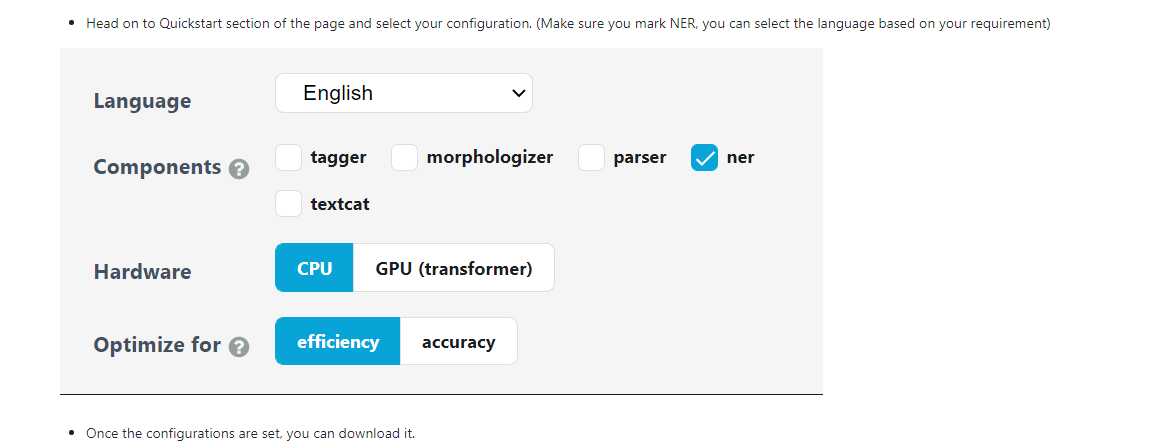

### Step 6 - Filling the config file


Go to the directory where base_config.cfg is stored and then run this command



In [4]:
!pip install spacy

     ---------------------------------------- 11.3/11.3 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 3.0 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.2 requires pillow!=8.3.0,>=5.3.0, which is not installed.
streamlit 1.5.0 requires pillow>=6.2.0, which is not installed.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, which is not installed.
matplotlib 3.4.3 requires pillow>=6.2.0, which is not installed.
imageio 2.9.0 requires pillow, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
bokeh 2.4.1 requires pillow>=7.1.0, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.
cached-path 1.0.2 requires tqdm<4.63,>=4.62, but you have tqdm 4.63.0 which is incompatible.


     ---------------------------------------- 76.6/76.6 KB 4.1 MB/s eta 0:00:00


In [5]:
os.chdir(r'D:\\OneDrive_2022-01-12\\training_data') #filling base_file with more parameters and creating new fil

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


2022-03-23 23:29:12.852882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-23 23:29:12.853645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


###  Step 7 - Run the Training configuration

python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy 

In [152]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #ignore error (OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.)

In [153]:
# #Testing Annotation
# import json
# file = 'D:\\OneDrive_2022-01-12\\test_annotations\\annotations0.json'         
# f = open(file)
# TRAIN_DATA1 = json.load(f)

In [154]:
# for text, annot in tqdm(TRAIN_DATA1['annotations']): 
#     doc = nlp.make_doc(text) 
#     ents = []
#     for start, end, label in annot["entities"]:
#         span = doc.char_span(start, end, label=label, alignment_mode="contract")
#         if span is None:
#             print("Skipping entity")
#         else:
#             ents.append(span)
#     doc.ents = ents 
#     db.add(doc)
    
# os.chdir(r'D:\OneDrive_2022-01-12\training_data')
# db.to_disk("./test.spacy") # save the docbin object

In [156]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
!python -m spacy train --gpu-id 0 config.cfg --output ./output --paths.train ./train1.spacy --paths.dev ./test2.spacy 

[+] Created output directory: output
[i] Saving to output directory: output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
[!] Aborting and saving the final best model. Encountered exception:
MemoryError((689149, 288), dtype('float32'))


2022-03-08 22:55:35.067519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-08 22:55:35.067574: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[2022-03-08 22:55:45,454] [INFO] Set up nlp object from config
[2022-03-08 22:55:45,469] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-03-08 22:55:45,474] [INFO] Created vocabulary
[2022-03-08 22:55:45,475] [INFO] Finished initializing nlp object
[2022-03-08 22:56:50,496] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
Traceback (most recent call last):
  File "D:\Users\A1058564\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Users\A1058564\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Users\A1058564\Anaconda3\lib\site-packages\spacy\__main__

[+] Created output directory: output
[i] Saving to output directory: output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00   8198.07    0.00    0.00    0.00    0.00
  4     200      17672.16  102867.51    2.81    6.80    1.77    0.03
  9     400      11563.95   6270.84   47.51   52.94   43.09    0.48
 14     600       4471.34   3794.33   66.27   64.23   68.44    0.66
[!] Aborting and saving the final best model. Encountered exception:
MemoryError((100012, 96), dtype('float32'))


2022-03-08 22:51:49.812880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-08 22:51:49.812950: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[2022-03-08 22:51:56,658] [INFO] Set up nlp object from config
[2022-03-08 22:51:56,672] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-03-08 22:51:56,678] [INFO] Created vocabulary
[2022-03-08 22:51:56,679] [INFO] Finished initializing nlp object
[2022-03-08 22:52:58,321] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
Traceback (most recent call last):
  File "D:\Users\A1058564\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Users\A1058564\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Users\A1058564\Anaconda3\lib\site-packages\spacy\__main__

[+] Created output directory: output
[i] Saving to output directory: output
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00   8198.07    0.00    0.00    0.00    0.00
  4     200      17672.16  102867.51    2.81    6.80    1.77    0.03
  9     400      11563.95   6270.84   47.51   52.94   43.09    0.48
 14     600       4471.34   3794.33   66.27   64.23   68.44    0.66
 19     800       2072.41   2493.16   74.38   74.12   74.65    0.74
 24    1000       1032.95   2220.95   79.33   75.40   83.69    0.79
 29    1200       3779.17   2095.76   82.27   83.55   81.03    0.82
 34    1400       7665.34   1982.56   83.87   83.87

In [11]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
!spacy evaluate ./sm_output_47/model-best ./file.txt


[i] Using CPU

================================== Results ==================================

TOK     -
NER P   -
NER R   -
NER F   -
SPEED   0



2022-05-10 13:02:06.221661: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-10 13:02:06.221708: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
D:\Users\A1058564\Anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.2.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
D:\Users\A1058564\Anaconda3\lib\site-packages\spacy\training\corpus.py:80: UserWarning: [W090] Could not locate any .spacy files in path 'file.txt'.
  warnings.warn(Warnings.W090.format(path=orig_path, format=file_type))


In [12]:
os.chdir('D:\\OneDrive_2022-01-12\\training_data')
eos = spacy.load(r".\sm_output_47\model-best")
with open('D:\\OneDrive_2022-01-12\\training_data\\0.txt',encoding='UTF-8') as f:
    data = f.read()
    
do = eos(data)
spans = do.spans["spancat"] # SpanGroup
print(spans.attrs["scores"])
for ent in do.ents:
    print(ent.text + ":", ent.label_)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive_2022-01-12\\training_data\\0.txt'

In [ ]:
os.chdir('D:\\OneDrive_2022-01-12\\training_data\\')
eos = spacy.load(r".\output\model-best")
with open('D:\\OneDrive_2022-01-12\\training_data\\9 FOLDERS INC-Master Software License Agreement-Master Software License Agreement-12-01-2016.txt',encoding='UTF-8') as f:
    data = f.read()
    
do = eos(data)
for ent in do.ents:
    print(ent.text + "--->", ent.label_)

### Step - 8 Loading the model

In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
nlp_ner = spacy.load(r".\output\model-best") #load the best model

### Step 9 - Getting the Predictions

In [ ]:
colors = {'EFFECTIVE DATE': "linear-gradient(90deg, #aa9cfc, #fc9ce7)", "SUPPLIER NAME": "#ff6961",'SUPPLIER ADDRESS': 'yellow','SUPPLIER STATE':'orange','NOTICE PERIOD': 'pink','ALIGHT ENTITY':'green','TERM LENGTH (MONTHS)':'blue','NET PAYMENT TERMS':'#85C1E9'}
options = {"ents": ['EFFECTIVE DATE', 'SUPPLIER NAME','NOTICE PERIOD','SUPPLIER STREET ADDRESS','ALIGHT ENTITY','TERM LENGTH (MONTHS)','NET PAYMENT TERMS'], "colors": colors}

In [ ]:
file = 'D:\\OneDrive_2022-01-12\\z\\0.txt'         
f = open(file)
doc = nlp_ner(f.read())
spacy.displacy.render(doc, style="ent", jupyter=True,options=options) # display in Jupyter
f.close

### Let's test our Model on Test Data

In [36]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data\sm_output_47')
nlp_ner33 = spacy.load(r".\model-best") #load the best model


l=[]
l1=[]

test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc1 = nlp_ner33(x)
    entities_list = ['SUPPLIER_NAME','SUPPLIER_STREET_ADRESS','SUPPLIER_CITY','SUPPLIER_ZIP_CODE','SUPPLIER_STATE','ALIGHT_ENTITY','NET_PAYMENT_TERM']
    for ent in doc1.ents:
        if ent.label_ == 'NOTICE_PERIOD':
            l.append(ent.text)
            l1.append(ent.label_)
        elif ent.text not in l and ent.label_ not in l1:
                l.append(ent.text)
                l1.append(ent.label_)
print(l, l1)
print(" -----------------------------------------------------------")

['radiant logic inc', '75 rowland way ste 300', 'novato', 'california', '94945', 'alight solutions llc', '90 days'] ['SUPPLIER_NAME', 'SUPPLIER_STREET_ADRESS', 'SUPPLIER_CITY', 'SUPPLIER_STATE', 'SUPPLIER_ZIP_CODE', 'ALIGHT_ENTITY', 'NET_PAYMENT_TERM']
 -----------------------------------------------------------


In [ ]:
for ent in doc1.ents:
    if ent.text not in l and ent.label_ == 'Notice':
        l.append(ent.text)
        l1.append(ent.label_)
        print(ent.text, ent.label_)
    print(" -----------------------------------------------------------")

In [ ]:
res:
for i in l:
    
    if i not in res:
        res.append(i)

### Saving Entities to DataFrame 

In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
nlp_ner331 = spacy.load(r".\output\model-best") #load the best model


Text=[]
Start_Index=[]
End_Index=[]
Label=[]
#test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]

for x in new_data1:
    doc1 = nlp_ner331(x)
    for ent in doc1.ents:
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)
        Text.append(ent.text)
        Start_Index.append(ent.start_char)        
        End_Index.append(ent.end_char)
        Label.append(ent.label_)
    data = {'Text': Text,'Label': Label}
    df = pd.DataFrame(data, columns = ['Text','Label'])
    

In [ ]:
df

### Saving File to Excel

In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
df.to_excel("output.xlsx",
             sheet_name='Predictions')

### Saving File to Json Object

In [ ]:
import os
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
js = df.to_json('output2.json', orient = 'records')

In [ ]:
# path = "D:\\OneDrive_2022-01-12\\z"
# os.chdir(path)
# full_text = []
# a = " "
# for file in glob.glob("*.txt"):
#     with open(file,'rb') as f:
#         print(file)
#         data = f.read()
#         a = str(data) + a

# with open(file,'w') as f:
#         data = f.write(a)

In [ ]:
# import os.path
# name_of_file  = 0
# save_path = 'D:\OneDrive_2022-01-12\z'
# name_of_file = input("Enter filename ")
# completeName = os.path.join(save_path, name_of_file +".txt")
# with open(completeName,'w') as f:
#     f.write(a)

In [ ]:
path = "D:\\OneDrive_2022-01-12\\15 pdfs"
os.chdir(path)
new_data1 = []
for file in glob.glob("*.pdf"):
    print(file)
    all_text = " "
    with pdfplumber.open(file) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                all_text = all_text + single_page_text
            if len(all_text) < 10:
                break
    new_data1.append(all_text)

In [ ]:
# Combining all the above  
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in range(0,len(new_data1)):
    new_data1[sentance] = BeautifulSoup(new_data1[sentance]).get_text()
    new_data1[sentance] = decontracted(new_data1[sentance])
    #new_data1[sentance] = re.sub("\S*\d\S*", "", new_data1[sentance]).strip() #to remove nos
    #new_data1[sentance] = re.sub('[^A-Za-z]+', ' ', new_data1[sentance])
    new_data1[sentance] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", new_data1[sentance]) # emails
    new_data1[sentance] = re.sub(r'[^\w ]+', "", new_data1[sentance])
    new_data1[sentance] = re.sub(r'[A-Za-z]+[\d]+[\w]*|[\d]+[A-Za-z]+[\w]*'," ",new_data1[sentance]) # for alphanummerical
    
    # https://gist.github.com/sebleier/554280
    new_data1[sentance] = ' '.join(e.lower() for e in new_data1[sentance].split() if e.lower() not in stopwords)
    preprocessed_reviews.append(new_data1[sentance].strip())

In [ ]:
def clean_text2(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt))

In [ ]:
def clean_text(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower())

In [ ]:
newest=[]
for i in new_data1:
        save = clean_text2(i)
        save = clean_text(save)
        newest.append(save)

In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data\shivani')
nlp_ner76 = spacy.load(r".\output\model-best") #load the best model



test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc1 = nlp_ner76(x)
    for ent in doc1.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print("-----------------------------------------------------------")


In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\Model')
nlp_ner33 = spacy.load(r".\output\model-best") #load the best model


Text=[]
Start_Index=[]
End_Index=[]
Label=[]
#test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
counter = 1 
for x in newest:
    
    doc1 = nlp_ner33(x)
    for ent in doc1.ents:
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)
        Text.append(ent.text)
        #Start_Index.append(ent.start_char)        
        #End_Index.append(ent.end_char)
        Label.append(ent.label_)
    data = {'Text': Text,'Label': Label}
    df = pd.DataFrame(data, columns = ['Text','Label'])
    df.drop_duplicates(keep=False,inplace=True)
    df.to_excel("Excel" +str(counter)+ ".xlsx",
             sheet_name='Predictions')
    counter+=1
    del df
    Text.clear() 
    Label.clear() 

In [ ]:
new_data1[0]

In [ ]:
path = "D:\OneDrive_2022-01-12\xml_text\main_xml.txt"
os.chdir(path)
with open('testing_test.txt',encoding='UTF-8') as f:
    all_text = f.read()

In [ ]:
# Combining all the above  
preprocessed_reviews = []
all_text = BeautifulSoup(all_text).get_text()
all_text = decontracted(all_text)
#new_data1[sentance] = re.sub("\S*\d\S*", "", new_data1[sentance]).strip() #to remove nos
#new_data1[sentance] = re.sub('[^A-Za-z]+', ' ', new_data1[sentance])
all_text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", all_text) # emails
all_text= re.sub(r'[^\w ]+', "", new_data1[sentance])
all_text = re.sub(r'[A-Za-z]+[\d]+[\w]*|[\d]+[A-Za-z]+[\w]*'," ",all_text) # for alphanummerical
    
    # https://gist.github.com/sebleier/554280
all_text = ' '.join(e.lower() for e in all_text.split() if e.lower() not in stopwords)
preprocessed_reviews.append(all_text.strip())

In [ ]:
all_text

In [ ]:
path = "D:\\OneDrive_2022-01-12\\xml_text"
os.chdir(path)
with open('main_xml.txt',encoding='UTF-8') as f:
      d = f.read()

In [ ]:
d

In [ ]:
save = clean_text2(d)
save = clean_text(d)

In [ ]:
save

In [ ]:
path = "D:\\OneDrive_2022-01-12\\xml_text"
os.chdir(path)
with open('final.txt','w') as f:
    f.write(save)

In [ ]:
##Final Testing
# save_path = 'D:\\OneDrive_2022-01-12\\z'
# name_of_file = 0
# counter = 0
# path = "D:\OneDrive_2022-01-12\PDF_text_Pur"
# os.chdir(path)
# final_data = []
# for file in glob.glob("*.txt"):
#     completeName = os.path.join(save_path, str(counter) +".txt")         
#     with open(completeName,'w',encoding='utf-8') as file1:
#         file1.write(i)
#         counter+=1

In [ ]:
import os.path
save_path = 'D:\\OneDrive_2022-01-12\\z'
name_of_file = 0
counter = 0
for i in new_data1:
    completeName = os.path.join(save_path, str(counter) +".txt")         
    with open(completeName,'w',encoding='utf-8') as file1:
        file1.write(i)
        counter+=1

In [ ]:
new_data1

In [ ]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data\shivani')
o = spacy.load(r".\output\model-best") #load the best model



test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc1 = o(x)
    for ent in doc1.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print("-----------------------------------------------------------")


In [ ]:
os.chdir('D:\\OneDrive_2022-01-12\\training_data')
ner_final = spacy.load(r".\output\model-best")

test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc1 = o(x)
    for ent in doc1.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print("-----------------------------------------------------------")


In [40]:
new_data1[0]

'docusign envelope id confidential supplier framework agreement supplier framework agreement agreement entered november 1 2018 effective date northgate information solutions limited offices peoplebuilding 2 peoplebuilding estate maylands avenue hemel hempstead hertfordshire england behalf affiliates nga benify ab registered office banérgatan 16 115 23 stockholm sweden behalf affiliates supplier either abovementioned parties also referred party collectively parties whereas nga desires supplier provide certain services described duly executed statement work supplier agrees provide nga affiliates including services support nga contracts therefore consideration premises mutual covenants agreements herein set forth supplier nga agree follows definitions capitalized terms herein schedule attachment meanings ascribed terms section otherwise defined agreement affiliate means entity directly indirectly controls controlled common control party control controls controlled means used respect perso

In [41]:
os.chdir(r'D:\OneDrive_2022-01-12\training_data')
nlpo = spacy.load(r".\output\model-best") #load the best model



test_sentences = [x for x in new_data1] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc1 = nlpo(x)
    for ent in doc1.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print("-----------------------------------------------------------")


confidential supplier framework agreement supplier framework agreement 21 91 SUPPLIER STREET ADDRESS
agreement entered november 1 2018 92 125 SUPPLIER STREET ADDRESS
limited offices 173 188 SUPPLIER STREET ADDRESS
avenue hemel 237 249 SUPPLIER STREET ADDRESS
england behalf 274 288 SUPPLIER STREET ADDRESS
registered office 314 331 SUPPLIER STREET ADDRESS
stockholm sweden 353 369 SUPPLIER STREET ADDRESS
behalf affiliates 370 387 SUPPLIER STREET ADDRESS
supplier provide certain 488 512 SUPPLIER STREET ADDRESS
executed statement work supplier 537 569 SUPPLIER STREET ADDRESS
agrees provide nga 570 588 SUPPLIER STREET ADDRESS
support nga contracts therefore 619 650 SUPPLIER STREET ADDRESS
mutual covenants agreements herein set forth 674 718 SUPPLIER STREET ADDRESS
agree follows 732 745 SUPPLIER STREET ADDRESS
capitalized terms 758 775 SUPPLIER STREET ADDRESS
herein schedule attachment meanings ascribed terms section otherwise defined agreement 776 862 SUPPLIER STREET ADDRESS
directly indirec

In [1]:
import torch

In [2]:
print(torch.__version__)

1.10.1+cpu


In [ ]:
!pip3 uninstall torch

In [30]:
testing

NameError: name 'testing' is not defined